In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Data for Training for "ForTraining_0001.csv".

### Data has two input columns/features/independent variables as numbers called A and B
### 9 mathematical operations have been performed to generate 9 dependent numerical columns
#### They are as below

* Addition = A + B
* Subtraction = A - B
* Multiplication = A * B
* Division = A / B
* Sin(Addition) = sin (A + B)
* Cos(Addition) = cos (A + B)
* sqrt(Addition) = SQRT( A + B) if (A + B) >= 0 or -1.00 if (A +B ) < 0
* 2 ^ Addition = 2 ^ (A +B)
* Log(Addition) = log(A + B)

### Additionally there is a dependent column present for classification training.
* ODD_OR_EVEN(CEIL(A+B)) = If MODULUS of CEIL(A + B) = 0 then "EVEN" else "ODD" [To be used for *classification training *]

In [47]:
Master_DF = pd.read_csv("./ForTraining_0001.csv")

In [48]:
Master_DF

,A,B,Addition,Subtraction,Multiplication,Division,Sin(Addition),Cos(Addition),Sqrt(Addition),2^Addition,Log(Addition),ODD_OR_EVEN(CEIL(A+B))
0,9.93,9.06,18.99,0.87,89.97,1.10,0.14,0.99,4.36,520666.48,1.28,Odd
1,-3.56,3.48,-0.08,-7.04,-12.39,-1.02,-0.08,1.00,-1.00,0.95,-1.00,Even
2,-7.52,8.24,0.72,-15.76,-61.96,-0.91,0.66,0.75,0.85,1.65,-0.14,Odd
3,-1.92,3.37,1.45,-5.29,-6.47,-0.57,0.99,0.12,1.20,2.73,0.16,Even
4,-5.55,7.42,1.87,-12.97,-41.18,-0.75,0.96,-0.29,1.37,3.66,0.27,Even
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-2.84,6.22,3.38,-9.06,-17.66,-0.46,-0.24,-0.97,1.84,10.41,0.53,Even
9996,-5.01,7.38,2.37,-12.39,-36.97,-0.68,0.70,-0.72,1.54,5.17,0.37,Odd
9997,4.74,-0.18,4.56,4.92,-0.85,-26.33,-0.99,-0.15,2.14,23.59,0.66,Odd
9998,-5.86,-0.03,-5.89,-5.83,0.18,195.33,0.38,0.92,-1.00,0.02,-1.00,Odd


In [49]:
class Training_Tensorflow:
    
    def __init__(self, 
                 Master_DF = Master_DF, 
                 OutputVector=None, 
                 ClassificationOrRegression="Regression"):
        
        self.Master_DF = Master_DF
        self.A = self.Master_DF.A
        self.B = self.Master_DF.B
        self.OutputVector = OutputVector
        self.TypeOfTraining = ClassificationOrRegression
        self.Training_DF = None
        self.Test_DF = None
        self.Model = None
        self.Predicted_DF = None
        self.TrainTestSplit()
        
    def TrainTestSplit(self, TestFractionSize=0.2):
        self.Training_DF, self.Test_DF = train_test_split(self.Master_DF, test_size=TestFractionSize)
        
    def TrainTheModel(self, 
                      DenseNodeSize = 1000, 
                      batch_size=500, 
                      epochs=25, 
                      activation='linear',
                      optimizer='sgd', 
                      loss='mean_squared_error',
                      final_activation='linear', 
                      metrics=[tf.keras.metrics.MeanSquaredLogarithmicError()]):
        self.Model = tf.keras.Sequential()
        self.Model.add(keras.layers.Dense(DenseNodeSize, activation=activation))
        self.Model.add(keras.layers.Dense(DenseNodeSize/10, activation=activation))
        self.Model.add(keras.layers.Dense(DenseNodeSize/100, activation=activation))
        self.Model.add(keras.layers.Activation(activation=final_activation))
        self.Model.compile(optimizer=optimizer,loss=loss,metrics=metrics)
        xs = np.array([(a,b) for a,b in zip(self.Training_DF.A,self.Training_DF.B)])
        ys = np.array(self.Training_DF[self.OutputVector], dtype='float')
        self.Model.fit(xs,ys,batch_size=batch_size,epochs=epochs)
        
    def PredictTheResult(self):
        self.Predicted_DF = pd.DataFrame(columns=['InputVals','PredictedVals','Difference'],dtype='float')
        self.Predicted_DF.InputVals = self.Test_DF[self.OutputVector]
        xs = np.array([(a,b) for a,b in zip(self.Test_DF.A,self.Test_DF.B)])
        self.Predicted_DF.PredictedVals = self.Model.predict(xs)[:len(self.Test_DF)]
        self.Predicted_DF.Difference = self.Predicted_DF.InputVals - self.Predicted_DF.PredictedVals
        
    def PredictOneVal(self, A=None, B=None):
        return np.round(self.Model.predict(np.array([[A,B]]))[0][0],2)
    
    def PlotThePredicted_DF(self):
        plt.figure()
        plt.plot(range(len(self.Test_DF)),self.Predicted_DF.Difference)
        plt.show()

# Let us try to see if we can learn addition behavior between A and B

In [50]:
AdditionTraining = Training_Tensorflow(OutputVector='Addition')
AdditionTraining.TrainTheModel()

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 0s 49us/sample - loss: 6.2122 - mean_squared_logarithmic_error: 0.1416
Epoch 2/25
8000/8000 [==============================] - 0s 15us/sample - loss: 4.2816e-05 - mean_squared_logarithmic_error: 1.7246e-06
Epoch 3/25
8000/8000 [==============================] - 0s 15us/sample - loss: 1.8976e-05 - mean_squared_logarithmic_error: 8.1479e-07
Epoch 4/25
8000/8000 [==============================] - 0s 15us/sample - loss: 8.7138e-06 - mean_squared_logarithmic_error: 3.6796e-07
Epoch 5/25
8000/8000 [==============================] - 0s 14us/sample - loss: 3.9887e-06 - mean_squared_logarithmic_error: 1.7056e-07
Epoch 6/25
8000/8000 [==============================] - 0s 15us/sample - loss: 1.8507e-06 - mean_squared_logarithmic_error: 8.1180e-08
Epoch 7/25
8000/8000 [==============================] - 0s 15us/sample - loss: 8.7928e-07 - mean_squared_logarithmic_error: 3.7561e-08
Epoch 8/25
8000/8000 [===================

In [51]:
AdditionTraining.PredictOneVal(A=220,B=300)

520.0

In [52]:
AdditionTraining.PredictTheResult()

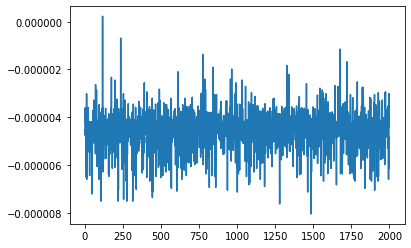

In [53]:
AdditionTraining.PlotThePredicted_DF()

# Let us try to see if we can learn subtraction behavior between A and B

In [70]:
SubtractionTraining = Training_Tensorflow(OutputVector='Subtraction')
SubtractionTraining.TrainTheModel()

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 0s 48us/sample - loss: 5.5050 - mean_squared_logarithmic_error: 0.1128
Epoch 2/25
8000/8000 [==============================] - 0s 15us/sample - loss: 4.9603e-06 - mean_squared_logarithmic_error: 2.2394e-07
Epoch 3/25
8000/8000 [==============================] - 0s 17us/sample - loss: 2.3223e-06 - mean_squared_logarithmic_error: 1.0161e-07
Epoch 4/25
8000/8000 [==============================] - 0s 14us/sample - loss: 1.1416e-06 - mean_squared_logarithmic_error: 4.9571e-08
Epoch 5/25
8000/8000 [==============================] - 0s 14us/sample - loss: 5.7272e-07 - mean_squared_logarithmic_error: 2.5269e-08
Epoch 6/25
8000/8000 [==============================] - 0s 15us/sample - loss: 2.9525e-07 - mean_squared_logarithmic_error: 1.2884e-08
Epoch 7/25
8000/8000 [==============================] - 0s 16us/sample - loss: 1.5889e-07 - mean_squared_logarithmic_error: 7.0099e-09
Epoch 8/25
8000/8000 [===================

In [71]:
SubtractionTraining.PredictOneVal(A=30,B=25)

5.0

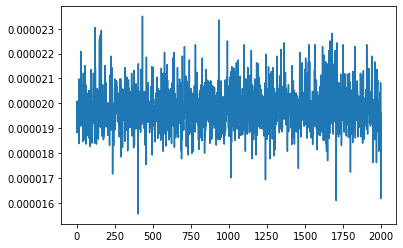

In [72]:
SubtractionTraining.PredictTheResult()
SubtractionTraining.PlotThePredicted_DF()

# Let us try to see if we can learn multiplication behavior between A and B

In [73]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(activation='selu',final_activation='linear')

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 1s 69us/sample - loss: 1020.3167 - mean_squared_logarithmic_error: 3.2012
Epoch 2/25
8000/8000 [==============================] - 0s 23us/sample - loss: 898.3397 - mean_squared_logarithmic_error: 2.6138
Epoch 3/25
8000/8000 [==============================] - 0s 23us/sample - loss: 928.7070 - mean_squared_logarithmic_error: 2.7489
Epoch 4/25
8000/8000 [==============================] - 0s 26us/sample - loss: 889.8068 - mean_squared_logarithmic_error: 2.5815
Epoch 5/25
8000/8000 [==============================] - 0s 25us/sample - loss: 893.8075 - mean_squared_logarithmic_error: 2.5491
Epoch 6/25
8000/8000 [==============================] - 0s 24us/sample - loss: 893.7904 - mean_squared_logarithmic_error: 2.5815
Epoch 7/25
8000/8000 [==============================] - 0s 23us/sample - loss: 880.2840 - mean_squared_logarithmic_error: 2.5045
Epoch 8/25
8000/8000 [==============================] - 0s 24us/sample - l

In [74]:
MultiplicationTraining.PredictOneVal(A=11,B=9)

-1.76

In [75]:
MultiplicationTraining.PredictOneVal(A=5,B=6)

-1.76

## Looks like it did a very bad job for multiplication. Given the code we can play with three parameters: number of nodes in each Dense layer, optimizer function, activation function and loss function. Let us first change Dense layer number of nodes. Let us double it and see if it helps.

In [184]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(activation='selu',final_activation='linear',DenseNodeSize=2000)

Train on 8000 samples
Epoch 1/25
8000/8000 [==============================] - 1s 102us/sample - loss: 1003.1303 - mean_squared_logarithmic_error: 3.0081
Epoch 2/25
8000/8000 [==============================] - 0s 60us/sample - loss: 915.8705 - mean_squared_logarithmic_error: 2.6057
Epoch 3/25
8000/8000 [==============================] - 0s 62us/sample - loss: 971.0156 - mean_squared_logarithmic_error: 3.1450
Epoch 4/25
8000/8000 [==============================] - 0s 59us/sample - loss: 886.8147 - mean_squared_logarithmic_error: 2.6420
Epoch 5/25
8000/8000 [==============================] - 0s 58us/sample - loss: 887.1153 - mean_squared_logarithmic_error: 2.6198
Epoch 6/25
8000/8000 [==============================] - 1s 71us/sample - loss: 875.6940 - mean_squared_logarithmic_error: 2.5357
Epoch 7/25
8000/8000 [==============================] - 0s 57us/sample - loss: 897.4871 - mean_squared_logarithmic_error: 2.6524
Epoch 8/25
8000/8000 [==============================] - 0s 57us/sample - 

## Looks like it didn't help much in this particular case. Let us go to the optimizer and activation and use adam optimizer + selu activation now and put back the number of nodes in dense layer back to 1000. We will also increase the epochs to 250

In [185]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(optimizer='adam',activation='selu',final_activation='linear',epochs=250)

Train on 8000 samples
Epoch 1/250
8000/8000 [==============================] - 1s 77us/sample - loss: 1030.5103 - mean_squared_logarithmic_error: 2.9451
Epoch 2/250
8000/8000 [==============================] - 0s 24us/sample - loss: 880.2131 - mean_squared_logarithmic_error: 2.5202
Epoch 3/250
8000/8000 [==============================] - 0s 27us/sample - loss: 805.6216 - mean_squared_logarithmic_error: 2.1734
Epoch 4/250
8000/8000 [==============================] - 0s 25us/sample - loss: 770.0408 - mean_squared_logarithmic_error: 1.8350
Epoch 5/250
8000/8000 [==============================] - 0s 24us/sample - loss: 741.8300 - mean_squared_logarithmic_error: 1.6167
Epoch 6/250
8000/8000 [==============================] - 0s 24us/sample - loss: 716.2399 - mean_squared_logarithmic_error: 1.4332
Epoch 7/250
8000/8000 [==============================] - 0s 25us/sample - loss: 690.9781 - mean_squared_logarithmic_error: 1.2342
Epoch 8/250
8000/8000 [==============================] - 0s 34us/sa

8000/8000 [==============================] - 0s 25us/sample - loss: 543.9551 - mean_squared_logarithmic_error: 0.2356
Epoch 126/250
8000/8000 [==============================] - 0s 23us/sample - loss: 543.9459 - mean_squared_logarithmic_error: 0.2358
Epoch 127/250
8000/8000 [==============================] - 0s 23us/sample - loss: 543.9229 - mean_squared_logarithmic_error: 0.2350
Epoch 128/250
8000/8000 [==============================] - 0s 22us/sample - loss: 543.9266 - mean_squared_logarithmic_error: 0.2349
Epoch 129/250
8000/8000 [==============================] - 0s 22us/sample - loss: 543.9075 - mean_squared_logarithmic_error: 0.2346
Epoch 130/250
8000/8000 [==============================] - 0s 22us/sample - loss: 543.9109 - mean_squared_logarithmic_error: 0.2343
Epoch 131/250
8000/8000 [==============================] - 0s 22us/sample - loss: 543.9154 - mean_squared_logarithmic_error: 0.2343
Epoch 132/250
8000/8000 [==============================] - 0s 22us/sample - loss: 543.9354

8000/8000 [==============================] - 0s 25us/sample - loss: 543.8274 - mean_squared_logarithmic_error: 0.2296
Epoch 250/250
8000/8000 [==============================] - 0s 22us/sample - loss: 543.9234 - mean_squared_logarithmic_error: 0.2303


In [186]:
MultiplicationTraining.PredictOneVal(A=11,B=9)

96.02

### Little better but still far off. Let us try to increase the epochs to 1000

In [187]:
MultiplicationTraining = Training_Tensorflow(OutputVector='Multiplication')
MultiplicationTraining.TrainTheModel(optimizer='adam',activation='selu',final_activation='linear',epochs=1000)

Train on 8000 samples
Epoch 1/1000
8000/8000 [==============================] - 1s 77us/sample - loss: 1055.3869 - mean_squared_logarithmic_error: 3.0257
Epoch 2/1000
8000/8000 [==============================] - 0s 24us/sample - loss: 899.8725 - mean_squared_logarithmic_error: 2.0224
Epoch 3/1000
8000/8000 [==============================] - 0s 25us/sample - loss: 779.8357 - mean_squared_logarithmic_error: 1.8874
Epoch 4/1000
8000/8000 [==============================] - 0s 24us/sample - loss: 725.8187 - mean_squared_logarithmic_error: 1.4804
Epoch 5/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 683.3499 - mean_squared_logarithmic_error: 1.1087
Epoch 6/1000
8000/8000 [==============================] - 0s 25us/sample - loss: 663.6136 - mean_squared_logarithmic_error: 1.0040
Epoch 7/1000
8000/8000 [==============================] - 0s 26us/sample - loss: 659.8099 - mean_squared_logarithmic_error: 0.9833
Epoch 8/1000
8000/8000 [==============================] - 0s

Epoch 63/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 518.6098 - mean_squared_logarithmic_error: 0.0483
Epoch 64/1000
8000/8000 [==============================] - 0s 23us/sample - loss: 518.4992 - mean_squared_logarithmic_error: 0.0435
Epoch 65/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 518.4805 - mean_squared_logarithmic_error: 0.0386
Epoch 66/1000
8000/8000 [==============================] - 0s 23us/sample - loss: 518.2896 - mean_squared_logarithmic_error: 0.0353
Epoch 67/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 518.2168 - mean_squared_logarithmic_error: 0.0314
Epoch 68/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 518.0941 - mean_squared_logarithmic_error: 0.0318
Epoch 69/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.9755 - mean_squared_logarithmic_error: 0.0296
Epoch 70/1000
8000/8000 [==============================] - 0s 22us/sample - 

8000/8000 [==============================] - 0s 23us/sample - loss: 517.4032 - mean_squared_logarithmic_error: 0.0047
Epoch 186/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3571 - mean_squared_logarithmic_error: 0.0041
Epoch 187/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3200 - mean_squared_logarithmic_error: 0.0038
Epoch 188/1000
8000/8000 [==============================] - 0s 21us/sample - loss: 517.3333 - mean_squared_logarithmic_error: 0.0040
Epoch 189/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3710 - mean_squared_logarithmic_error: 0.0042
Epoch 190/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3729 - mean_squared_logarithmic_error: 0.0042
Epoch 191/1000
8000/8000 [==============================] - 0s 23us/sample - loss: 517.4253 - mean_squared_logarithmic_error: 0.0042
Epoch 192/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 5

8000/8000 [==============================] - 0s 23us/sample - loss: 517.3272 - mean_squared_logarithmic_error: 0.0022
Epoch 308/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3439 - mean_squared_logarithmic_error: 0.0023
Epoch 309/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3007 - mean_squared_logarithmic_error: 0.0017
Epoch 310/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3040 - mean_squared_logarithmic_error: 0.0018
Epoch 311/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2899 - mean_squared_logarithmic_error: 0.0016
Epoch 312/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3050 - mean_squared_logarithmic_error: 0.0018
Epoch 313/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2986 - mean_squared_logarithmic_error: 0.0018
Epoch 314/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 5

8000/8000 [==============================] - 0s 26us/sample - loss: 517.3092 - mean_squared_logarithmic_error: 0.0013
Epoch 430/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2850 - mean_squared_logarithmic_error: 9.5612e-04
Epoch 431/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2715 - mean_squared_logarithmic_error: 9.3918e-04
Epoch 432/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2786 - mean_squared_logarithmic_error: 9.4135e-04
Epoch 433/1000
8000/8000 [==============================] - 0s 23us/sample - loss: 517.2762 - mean_squared_logarithmic_error: 9.6375e-04
Epoch 434/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2687 - mean_squared_logarithmic_error: 8.5824e-04
Epoch 435/1000
8000/8000 [==============================] - 0s 21us/sample - loss: 517.2714 - mean_squared_logarithmic_error: 8.7791e-04
Epoch 436/1000
8000/8000 [==============================] - 

8000/8000 [==============================] - 0s 25us/sample - loss: 517.2654 - mean_squared_logarithmic_error: 6.2857e-04
Epoch 550/1000
8000/8000 [==============================] - 0s 24us/sample - loss: 517.2839 - mean_squared_logarithmic_error: 7.9012e-04
Epoch 551/1000
8000/8000 [==============================] - 0s 25us/sample - loss: 517.3519 - mean_squared_logarithmic_error: 0.0014
Epoch 552/1000
8000/8000 [==============================] - 0s 25us/sample - loss: 517.2961 - mean_squared_logarithmic_error: 8.7093e-04
Epoch 553/1000
8000/8000 [==============================] - 0s 25us/sample - loss: 517.3396 - mean_squared_logarithmic_error: 0.0014
Epoch 554/1000
8000/8000 [==============================] - 0s 24us/sample - loss: 517.2822 - mean_squared_logarithmic_error: 8.1150e-04
Epoch 555/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2700 - mean_squared_logarithmic_error: 6.7272e-04
Epoch 556/1000
8000/8000 [==============================] - 0s 2

8000/8000 [==============================] - 0s 23us/sample - loss: 517.2676 - mean_squared_logarithmic_error: 5.1453e-04
Epoch 670/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2678 - mean_squared_logarithmic_error: 5.5985e-04
Epoch 671/1000
8000/8000 [==============================] - 0s 23us/sample - loss: 517.2854 - mean_squared_logarithmic_error: 6.6199e-04
Epoch 672/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2865 - mean_squared_logarithmic_error: 7.5050e-04
Epoch 673/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3062 - mean_squared_logarithmic_error: 8.0255e-04
Epoch 674/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3516 - mean_squared_logarithmic_error: 0.0015
Epoch 675/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.4126 - mean_squared_logarithmic_error: 0.0019
Epoch 676/1000
8000/8000 [==============================] - 0s 2

8000/8000 [==============================] - 0s 25us/sample - loss: 517.2845 - mean_squared_logarithmic_error: 6.4131e-04
Epoch 790/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3200 - mean_squared_logarithmic_error: 9.9784e-04
Epoch 791/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3583 - mean_squared_logarithmic_error: 0.0013
Epoch 792/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2875 - mean_squared_logarithmic_error: 5.3676e-04
Epoch 793/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.3045 - mean_squared_logarithmic_error: 7.7999e-04
Epoch 794/1000
8000/8000 [==============================] - 0s 23us/sample - loss: 517.2774 - mean_squared_logarithmic_error: 5.4602e-04
Epoch 795/1000
8000/8000 [==============================] - 0s 23us/sample - loss: 517.2651 - mean_squared_logarithmic_error: 4.3741e-04
Epoch 796/1000
8000/8000 [==============================] - 

8000/8000 [==============================] - 0s 24us/sample - loss: 517.3303 - mean_squared_logarithmic_error: 0.0010
Epoch 910/1000
8000/8000 [==============================] - 0s 22us/sample - loss: 517.2702 - mean_squared_logarithmic_error: 4.1950e-04
Epoch 911/1000
8000/8000 [==============================] - 0s 25us/sample - loss: 517.2660 - mean_squared_logarithmic_error: 3.6028e-04
Epoch 912/1000
8000/8000 [==============================] - 0s 32us/sample - loss: 517.2695 - mean_squared_logarithmic_error: 4.4476e-04
Epoch 913/1000
8000/8000 [==============================] - 0s 26us/sample - loss: 517.2691 - mean_squared_logarithmic_error: 3.7378e-04
Epoch 914/1000
8000/8000 [==============================] - 0s 24us/sample - loss: 517.2664 - mean_squared_logarithmic_error: 3.9434e-04
Epoch 915/1000
8000/8000 [==============================] - 0s 24us/sample - loss: 517.2693 - mean_squared_logarithmic_error: 4.2590e-04
Epoch 916/1000
8000/8000 [==============================] - 

In [188]:
MultiplicationTraining.PredictOneVal(A=11,B=9)

96.41

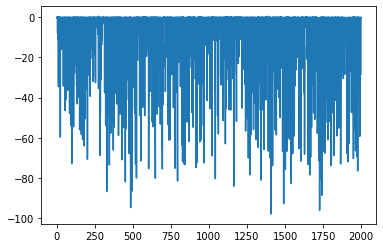

In [190]:
MultiplicationTraining.PredictTheResult()
MultiplicationTraining.PlotThePredicted_DF()

### As you can see it is relatively difficult. Why don't you play with it and find out a good solution?

### Let us move to Sin and Cos

In [163]:
SinTraining = Training_Tensorflow(OutputVector='Sin(Addition)')
SinTraining.TrainTheModel(activation='selu',final_activation='tanh',epochs=250)

Train on 8000 samples
Epoch 1/250
8000/8000 [==============================] - 1s 73us/sample - loss: 0.5933 - mean_squared_logarithmic_error: 0.1167
Epoch 2/250
8000/8000 [==============================] - 0s 26us/sample - loss: 0.5164 - mean_squared_logarithmic_error: 0.1140
Epoch 3/250
8000/8000 [==============================] - 0s 25us/sample - loss: 0.5104 - mean_squared_logarithmic_error: 0.1133
Epoch 4/250
8000/8000 [==============================] - 0s 25us/sample - loss: 0.5037 - mean_squared_logarithmic_error: 0.1139
Epoch 5/250
8000/8000 [==============================] - 0s 24us/sample - loss: 0.5025 - mean_squared_logarithmic_error: 0.1140
Epoch 6/250
8000/8000 [==============================] - 0s 24us/sample - loss: 0.5044 - mean_squared_logarithmic_error: 0.1146
Epoch 7/250
8000/8000 [==============================] - 0s 25us/sample - loss: 0.5027 - mean_squared_logarithmic_error: 0.1144
Epoch 8/250
8000/8000 [==============================] - 0s 25us/sample - loss: 0.

8000/8000 [==============================] - 0s 24us/sample - loss: 0.4752 - mean_squared_logarithmic_error: 0.1131
Epoch 128/250
8000/8000 [==============================] - 0s 23us/sample - loss: 0.4749 - mean_squared_logarithmic_error: 0.1133
Epoch 129/250
8000/8000 [==============================] - 0s 24us/sample - loss: 0.4729 - mean_squared_logarithmic_error: 0.1148
Epoch 130/250
8000/8000 [==============================] - 0s 24us/sample - loss: 0.4717 - mean_squared_logarithmic_error: 0.1114
Epoch 131/250
8000/8000 [==============================] - 0s 26us/sample - loss: 0.4755 - mean_squared_logarithmic_error: 0.1134
Epoch 132/250
8000/8000 [==============================] - 0s 26us/sample - loss: 0.4754 - mean_squared_logarithmic_error: 0.1119
Epoch 133/250
8000/8000 [==============================] - 0s 24us/sample - loss: 0.4707 - mean_squared_logarithmic_error: 0.1139
Epoch 134/250
8000/8000 [==============================] - 0s 24us/sample - loss: 0.4737 - mean_squared_

In [192]:
CosTraining = Training_Tensorflow(OutputVector='Cos(Addition)')
CosTraining.TrainTheModel(activation='selu',final_activation='tanh',epochs=250)

Train on 8000 samples
Epoch 1/250
8000/8000 [==============================] - 1s 68us/sample - loss: 0.5645 - mean_squared_logarithmic_error: 0.1187
Epoch 2/250
8000/8000 [==============================] - 0s 24us/sample - loss: 0.5124 - mean_squared_logarithmic_error: 0.1158
Epoch 3/250
8000/8000 [==============================] - 0s 26us/sample - loss: 0.5081 - mean_squared_logarithmic_error: 0.1150
Epoch 4/250
8000/8000 [==============================] - 0s 25us/sample - loss: 0.5075 - mean_squared_logarithmic_error: 0.1138
Epoch 5/250
8000/8000 [==============================] - 0s 23us/sample - loss: 0.5028 - mean_squared_logarithmic_error: 0.1142
Epoch 6/250
8000/8000 [==============================] - 0s 23us/sample - loss: 0.5037 - mean_squared_logarithmic_error: 0.1148
Epoch 7/250
8000/8000 [==============================] - 0s 31us/sample - loss: 0.4953 - mean_squared_logarithmic_error: 0.1162
Epoch 8/250
8000/8000 [==============================] - 0s 33us/sample - loss: 0.

8000/8000 [==============================] - 0s 25us/sample - loss: 0.4732 - mean_squared_logarithmic_error: 0.1075
Epoch 128/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4857 - mean_squared_logarithmic_error: 0.1080
Epoch 129/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4770 - mean_squared_logarithmic_error: 0.1061
Epoch 130/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4681 - mean_squared_logarithmic_error: 0.1100
Epoch 131/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4672 - mean_squared_logarithmic_error: 0.1095
Epoch 132/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4712 - mean_squared_logarithmic_error: 0.1077
Epoch 133/250
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4748 - mean_squared_logarithmic_error: 0.1084
Epoch 134/250
8000/8000 [==============================] - 0s 21us/sample - loss: 0.4763 - mean_squared_

In [193]:
SinTraining.PredictOneVal(A=0.5,B=0.5)

0.2

In [194]:
CosTraining.PredictOneVal(A=0.0,B=0.0)

0.16

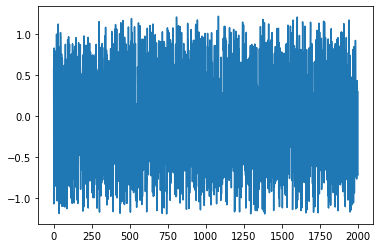

In [195]:
SinTraining.PredictTheResult()
SinTraining.PlotThePredicted_DF()

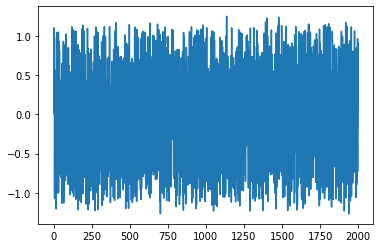

In [196]:
CosTraining.PredictTheResult()
CosTraining.PlotThePredicted_DF()

### Looks like it is not working for Sin and Cos well either. Now we will see 2^Addition, Sqrt(Addition) and log(Addition)

In [91]:
TwoPowerTraining = Training_Tensorflow(OutputVector='2^Addition')
TwoPowerTraining.TrainTheModel(DenseNodeSize=500, loss=tf.keras.losses.Huber(),batch_size=500, optimizer='Adagrad',activation='selu', final_activation='relu',epochs=500)

Train on 8000 samples
Epoch 1/500
8000/8000 [==============================] - 1s 70us/sample - loss: 5918.2843 - mean_squared_logarithmic_error: 10.6619
Epoch 2/500
8000/8000 [==============================] - 0s 13us/sample - loss: 5916.8828 - mean_squared_logarithmic_error: 8.3592
Epoch 3/500
8000/8000 [==============================] - 0s 13us/sample - loss: 5915.9023 - mean_squared_logarithmic_error: 7.5379
Epoch 4/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5915.0533 - mean_squared_logarithmic_error: 6.9797
Epoch 5/500
8000/8000 [==============================] - 0s 14us/sample - loss: 5914.2733 - mean_squared_logarithmic_error: 6.5616
Epoch 6/500
8000/8000 [==============================] - 0s 13us/sample - loss: 5913.5401 - mean_squared_logarithmic_error: 6.2311
Epoch 7/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5912.8338 - mean_squared_logarithmic_error: 5.9539
Epoch 8/500
8000/8000 [==============================] - 0s 

Epoch 63/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5882.2715 - mean_squared_logarithmic_error: 2.8224
Epoch 64/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5881.8268 - mean_squared_logarithmic_error: 2.8094
Epoch 65/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5881.3842 - mean_squared_logarithmic_error: 2.7965
Epoch 66/500
8000/8000 [==============================] - 0s 11us/sample - loss: 5880.9418 - mean_squared_logarithmic_error: 2.7834
Epoch 67/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5880.5005 - mean_squared_logarithmic_error: 2.7711
Epoch 68/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5880.0607 - mean_squared_logarithmic_error: 2.7587
Epoch 69/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5879.6224 - mean_squared_logarithmic_error: 2.7469
Epoch 70/500
8000/8000 [==============================] - 0s 12us/sample - l

8000/8000 [==============================] - 0s 13us/sample - loss: 5857.1608 - mean_squared_logarithmic_error: 2.3341
Epoch 125/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5856.7724 - mean_squared_logarithmic_error: 2.3293
Epoch 126/500
8000/8000 [==============================] - 0s 13us/sample - loss: 5856.3848 - mean_squared_logarithmic_error: 2.3244
Epoch 127/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5855.9972 - mean_squared_logarithmic_error: 2.3196
Epoch 128/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5855.6104 - mean_squared_logarithmic_error: 2.3143
Epoch 129/500
8000/8000 [==============================] - 0s 15us/sample - loss: 5855.2234 - mean_squared_logarithmic_error: 2.3096
Epoch 130/500
8000/8000 [==============================] - 0s 14us/sample - loss: 5854.8388 - mean_squared_logarithmic_error: 2.3047
Epoch 131/500
8000/8000 [==============================] - 0s 13us/sample - loss: 5

8000/8000 [==============================] - 0s 12us/sample - loss: 5834.2770 - mean_squared_logarithmic_error: 2.1169
Epoch 186/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5833.9193 - mean_squared_logarithmic_error: 2.1148
Epoch 187/500
8000/8000 [==============================] - 0s 13us/sample - loss: 5833.5623 - mean_squared_logarithmic_error: 2.1127
Epoch 188/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5833.2069 - mean_squared_logarithmic_error: 2.1106
Epoch 189/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5832.8512 - mean_squared_logarithmic_error: 2.1082
Epoch 190/500
8000/8000 [==============================] - 0s 13us/sample - loss: 5832.4968 - mean_squared_logarithmic_error: 2.1061
Epoch 191/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5832.1415 - mean_squared_logarithmic_error: 2.1038
Epoch 192/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5

8000/8000 [==============================] - 0s 14us/sample - loss: 5813.4517 - mean_squared_logarithmic_error: 2.0275
Epoch 247/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5813.1277 - mean_squared_logarithmic_error: 2.0265
Epoch 248/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5812.8044 - mean_squared_logarithmic_error: 2.0258
Epoch 249/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5812.4814 - mean_squared_logarithmic_error: 2.0251
Epoch 250/500
8000/8000 [==============================] - 0s 13us/sample - loss: 5812.1588 - mean_squared_logarithmic_error: 2.0245
Epoch 251/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5811.8377 - mean_squared_logarithmic_error: 2.0238
Epoch 252/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5811.5147 - mean_squared_logarithmic_error: 2.0228
Epoch 253/500
8000/8000 [==============================] - 0s 14us/sample - loss: 5

8000/8000 [==============================] - 0s 14us/sample - loss: 5794.3097 - mean_squared_logarithmic_error: 1.9893
Epoch 308/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5794.0067 - mean_squared_logarithmic_error: 1.9890
Epoch 309/500
8000/8000 [==============================] - 0s 13us/sample - loss: 5793.7039 - mean_squared_logarithmic_error: 1.9887
Epoch 310/500
8000/8000 [==============================] - 0s 13us/sample - loss: 5793.4020 - mean_squared_logarithmic_error: 1.9882
Epoch 311/500
8000/8000 [==============================] - 0s 14us/sample - loss: 5793.1001 - mean_squared_logarithmic_error: 1.9878
Epoch 312/500
8000/8000 [==============================] - 0s 15us/sample - loss: 5792.7987 - mean_squared_logarithmic_error: 1.9874
Epoch 313/500
8000/8000 [==============================] - 0s 13us/sample - loss: 5792.4970 - mean_squared_logarithmic_error: 1.9869
Epoch 314/500
8000/8000 [==============================] - 0s 13us/sample - loss: 5

8000/8000 [==============================] - 0s 13us/sample - loss: 5776.5453 - mean_squared_logarithmic_error: 1.9816
Epoch 369/500
8000/8000 [==============================] - 0s 14us/sample - loss: 5776.2662 - mean_squared_logarithmic_error: 1.9816
Epoch 370/500
8000/8000 [==============================] - 0s 14us/sample - loss: 5775.9871 - mean_squared_logarithmic_error: 1.9818
Epoch 371/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5775.7085 - mean_squared_logarithmic_error: 1.9820
Epoch 372/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5775.4309 - mean_squared_logarithmic_error: 1.9825
Epoch 373/500
8000/8000 [==============================] - 0s 13us/sample - loss: 5775.1521 - mean_squared_logarithmic_error: 1.9826
Epoch 374/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5774.8739 - mean_squared_logarithmic_error: 1.9826
Epoch 375/500
8000/8000 [==============================] - 0s 15us/sample - loss: 5

8000/8000 [==============================] - 0s 11us/sample - loss: 5760.1182 - mean_squared_logarithmic_error: 1.9984
Epoch 430/500
8000/8000 [==============================] - 0s 11us/sample - loss: 5759.8631 - mean_squared_logarithmic_error: 1.9990
Epoch 431/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5759.6053 - mean_squared_logarithmic_error: 1.9997
Epoch 432/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5759.3492 - mean_squared_logarithmic_error: 2.0000
Epoch 433/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5759.0959 - mean_squared_logarithmic_error: 2.0003
Epoch 434/500
8000/8000 [==============================] - 0s 11us/sample - loss: 5758.8389 - mean_squared_logarithmic_error: 2.0007
Epoch 435/500
8000/8000 [==============================] - 0s 11us/sample - loss: 5758.5851 - mean_squared_logarithmic_error: 2.0012
Epoch 436/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5

8000/8000 [==============================] - 0s 11us/sample - loss: 5744.9738 - mean_squared_logarithmic_error: 2.0256
Epoch 491/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5744.7355 - mean_squared_logarithmic_error: 2.0258
Epoch 492/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5744.4981 - mean_squared_logarithmic_error: 2.0260
Epoch 493/500
8000/8000 [==============================] - 0s 11us/sample - loss: 5744.2600 - mean_squared_logarithmic_error: 2.0263
Epoch 494/500
8000/8000 [==============================] - 0s 11us/sample - loss: 5744.0231 - mean_squared_logarithmic_error: 2.0267
Epoch 495/500
8000/8000 [==============================] - 0s 12us/sample - loss: 5743.7875 - mean_squared_logarithmic_error: 2.0275
Epoch 496/500
8000/8000 [==============================] - 0s 11us/sample - loss: 5743.5523 - mean_squared_logarithmic_error: 2.0278
Epoch 497/500
8000/8000 [==============================] - 0s 11us/sample - loss: 5

In [92]:
TwoPowerTraining.PredictOneVal(A=3,B=3)

867.49

In [96]:
Non_Negative_DF = Master_DF[(Master_DF.A+Master_DF.B)>0.0]
SqrtTraining = Training_Tensorflow(Master_DF=Non_Negative_DF,OutputVector='Sqrt(Addition)')
SqrtTraining.TrainTheModel(DenseNodeSize=500, optimizer='adam',activation='selu', final_activation='selu',epochs=250)

Train on 4032 samples
Epoch 1/250
4032/4032 [==============================] - 1s 144us/sample - loss: 2.4671 - mean_squared_logarithmic_error: 0.3208
Epoch 2/250
4032/4032 [==============================] - 0s 16us/sample - loss: 0.6988 - mean_squared_logarithmic_error: 0.0401
Epoch 3/250
4032/4032 [==============================] - 0s 13us/sample - loss: 0.1996 - mean_squared_logarithmic_error: 0.0235
Epoch 4/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0644 - mean_squared_logarithmic_error: 0.0078
Epoch 5/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0499 - mean_squared_logarithmic_error: 0.0048
Epoch 6/250
4032/4032 [==============================] - 0s 15us/sample - loss: 0.0196 - mean_squared_logarithmic_error: 0.0028
Epoch 7/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0114 - mean_squared_logarithmic_error: 0.0019
Epoch 8/250
4032/4032 [==============================] - 0s 15us/sample - loss: 0

Epoch 63/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0013 - mean_squared_logarithmic_error: 4.7821e-04
Epoch 64/250
4032/4032 [==============================] - 0s 13us/sample - loss: 0.0013 - mean_squared_logarithmic_error: 4.7260e-04
Epoch 65/250
4032/4032 [==============================] - 0s 15us/sample - loss: 0.0012 - mean_squared_logarithmic_error: 4.7179e-04
Epoch 66/250
4032/4032 [==============================] - 0s 12us/sample - loss: 0.0012 - mean_squared_logarithmic_error: 4.6365e-04
Epoch 67/250
4032/4032 [==============================] - 0s 12us/sample - loss: 0.0012 - mean_squared_logarithmic_error: 4.6149e-04
Epoch 68/250
4032/4032 [==============================] - 0s 13us/sample - loss: 0.0012 - mean_squared_logarithmic_error: 4.6531e-04
Epoch 69/250
4032/4032 [==============================] - 0s 15us/sample - loss: 0.0012 - mean_squared_logarithmic_error: 4.4779e-04
Epoch 70/250
4032/4032 [==============================] - 0s 14us/sam

4032/4032 [==============================] - 0s 15us/sample - loss: 7.3964e-04 - mean_squared_logarithmic_error: 2.9808e-04
Epoch 123/250
4032/4032 [==============================] - 0s 16us/sample - loss: 7.3138e-04 - mean_squared_logarithmic_error: 2.9228e-04
Epoch 124/250
4032/4032 [==============================] - 0s 14us/sample - loss: 7.1577e-04 - mean_squared_logarithmic_error: 2.8822e-04
Epoch 125/250
4032/4032 [==============================] - 0s 18us/sample - loss: 8.3379e-04 - mean_squared_logarithmic_error: 3.1827e-04
Epoch 126/250
4032/4032 [==============================] - 0s 17us/sample - loss: 7.4255e-04 - mean_squared_logarithmic_error: 2.9673e-04
Epoch 127/250
4032/4032 [==============================] - 0s 19us/sample - loss: 7.3310e-04 - mean_squared_logarithmic_error: 2.9224e-04
Epoch 128/250
4032/4032 [==============================] - 0s 13us/sample - loss: 7.0092e-04 - mean_squared_logarithmic_error: 2.8541e-04
Epoch 129/250
4032/4032 [=======================

4032/4032 [==============================] - 0s 14us/sample - loss: 7.6131e-04 - mean_squared_logarithmic_error: 2.6175e-04
Epoch 182/250
4032/4032 [==============================] - 0s 14us/sample - loss: 6.5978e-04 - mean_squared_logarithmic_error: 2.3947e-04
Epoch 183/250
4032/4032 [==============================] - 0s 15us/sample - loss: 7.6876e-04 - mean_squared_logarithmic_error: 2.6209e-04
Epoch 184/250
4032/4032 [==============================] - 0s 19us/sample - loss: 5.9824e-04 - mean_squared_logarithmic_error: 2.2961e-04
Epoch 185/250
4032/4032 [==============================] - 0s 16us/sample - loss: 0.0012 - mean_squared_logarithmic_error: 3.3245e-04
Epoch 186/250
4032/4032 [==============================] - 0s 16us/sample - loss: 0.0012 - mean_squared_logarithmic_error: 3.3428e-04
Epoch 187/250
4032/4032 [==============================] - 0s 15us/sample - loss: 7.3025e-04 - mean_squared_logarithmic_error: 2.5197e-04
Epoch 188/250
4032/4032 [==============================]

Epoch 241/250
4032/4032 [==============================] - 0s 18us/sample - loss: 0.0020 - mean_squared_logarithmic_error: 4.4868e-04
Epoch 242/250
4032/4032 [==============================] - 0s 17us/sample - loss: 0.0020 - mean_squared_logarithmic_error: 3.9143e-04
Epoch 243/250
4032/4032 [==============================] - 0s 18us/sample - loss: 0.0021 - mean_squared_logarithmic_error: 4.7298e-04
Epoch 244/250
4032/4032 [==============================] - 0s 15us/sample - loss: 0.0030 - mean_squared_logarithmic_error: 6.5926e-04
Epoch 245/250
4032/4032 [==============================] - 0s 13us/sample - loss: 0.0014 - mean_squared_logarithmic_error: 3.4864e-04
Epoch 246/250
4032/4032 [==============================] - 0s 13us/sample - loss: 0.0014 - mean_squared_logarithmic_error: 3.5541e-04
Epoch 247/250
4032/4032 [==============================] - 0s 14us/sample - loss: 8.2362e-04 - mean_squared_logarithmic_error: 2.5460e-04
Epoch 248/250
4032/4032 [==============================] -

In [97]:
SqrtTraining.PredictOneVal(A=25,B=24)

7.15

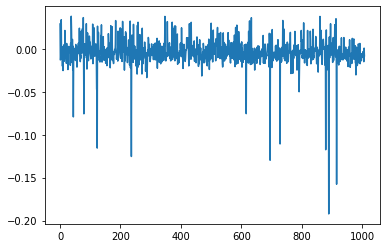

In [98]:
SqrtTraining.PredictTheResult()
SqrtTraining.PlotThePredicted_DF()

In [119]:
Master_DF_Copy = Master_DF[(Master_DF.A+Master_DF.B)>0.00]
# Master_DF_Copy = Master_DF_Copy[Master_DF_Copy['Log(Addition)']!=1.00]
Master_DF_Copy['Log(Addition)'] = pd.to_numeric(Master_DF_Copy['Log(Addition)'])
LogTraining = Training_Tensorflow(Master_DF=Master_DF_Copy,OutputVector='Log(Addition)')
LogTraining.TrainTheModel(DenseNodeSize=500, optimizer='adam',activation='selu', final_activation='selu',epochs=250)

/home/particle/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 4032 samples
Epoch 1/250
4032/4032 [==============================] - 1s 226us/sample - loss: 0.5801 - mean_squared_logarithmic_error: 0.0945
Epoch 2/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.1699 - mean_squared_logarithmic_error: 0.0449
Epoch 3/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0909 - mean_squared_logarithmic_error: 0.0163
Epoch 4/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0572 - mean_squared_logarithmic_error: 0.0084
Epoch 5/250
4032/4032 [==============================] - 0s 17us/sample - loss: 0.0382 - mean_squared_logarithmic_error: 0.0049
Epoch 6/250
4032/4032 [==============================] - 0s 16us/sample - loss: 0.0262 - mean_squared_logarithmic_error: 0.0031
Epoch 7/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0206 - mean_squared_logarithmic_error: 0.0029
Epoch 8/250
4032/4032 [==============================] - 0s 15us/sample - loss: 0

4032/4032 [==============================] - 0s 13us/sample - loss: 0.0071 - mean_squared_logarithmic_error: 3.2440e-04
Epoch 63/250
4032/4032 [==============================] - 0s 16us/sample - loss: 0.0068 - mean_squared_logarithmic_error: 2.4383e-04
Epoch 64/250
4032/4032 [==============================] - 0s 12us/sample - loss: 0.0063 - mean_squared_logarithmic_error: 1.6489e-04
Epoch 65/250
4032/4032 [==============================] - 0s 13us/sample - loss: 0.0063 - mean_squared_logarithmic_error: 1.7755e-04
Epoch 66/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0074 - mean_squared_logarithmic_error: 4.1664e-04
Epoch 67/250
4032/4032 [==============================] - 0s 13us/sample - loss: 0.0074 - mean_squared_logarithmic_error: 4.1899e-04
Epoch 68/250
4032/4032 [==============================] - 0s 13us/sample - loss: 0.0068 - mean_squared_logarithmic_error: 3.1404e-04
Epoch 69/250
4032/4032 [==============================] - 0s 13us/sample - loss: 0

4032/4032 [==============================] - 0s 17us/sample - loss: 0.0054 - mean_squared_logarithmic_error: 2.1577e-04
Epoch 124/250
4032/4032 [==============================] - 0s 15us/sample - loss: 0.0053 - mean_squared_logarithmic_error: 2.3014e-04
Epoch 125/250
4032/4032 [==============================] - 0s 15us/sample - loss: 0.0054 - mean_squared_logarithmic_error: 2.1071e-04
Epoch 126/250
4032/4032 [==============================] - 0s 13us/sample - loss: 0.0052 - mean_squared_logarithmic_error: 2.0259e-04
Epoch 127/250
4032/4032 [==============================] - 0s 13us/sample - loss: 0.0055 - mean_squared_logarithmic_error: 2.9121e-04
Epoch 128/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0060 - mean_squared_logarithmic_error: 3.9946e-04
Epoch 129/250
4032/4032 [==============================] - 0s 15us/sample - loss: 0.0073 - mean_squared_logarithmic_error: 7.3947e-04
Epoch 130/250
4032/4032 [==============================] - 0s 14us/sample - 

4032/4032 [==============================] - 0s 15us/sample - loss: 0.0049 - mean_squared_logarithmic_error: 3.0843e-04
Epoch 185/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0048 - mean_squared_logarithmic_error: 2.6199e-04
Epoch 186/250
4032/4032 [==============================] - 0s 15us/sample - loss: 0.0047 - mean_squared_logarithmic_error: 2.4528e-04
Epoch 187/250
4032/4032 [==============================] - 0s 13us/sample - loss: 0.0046 - mean_squared_logarithmic_error: 2.0246e-04
Epoch 188/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0050 - mean_squared_logarithmic_error: 3.5724e-04
Epoch 189/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0055 - mean_squared_logarithmic_error: 4.6714e-04
Epoch 190/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0055 - mean_squared_logarithmic_error: 4.1587e-04
Epoch 191/250
4032/4032 [==============================] - 0s 14us/sample - 

4032/4032 [==============================] - 0s 16us/sample - loss: 0.0072 - mean_squared_logarithmic_error: 9.6146e-04
Epoch 246/250
4032/4032 [==============================] - 0s 16us/sample - loss: 0.0064 - mean_squared_logarithmic_error: 8.5049e-04
Epoch 247/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0062 - mean_squared_logarithmic_error: 7.7839e-04
Epoch 248/250
4032/4032 [==============================] - 0s 13us/sample - loss: 0.0049 - mean_squared_logarithmic_error: 4.6068e-04
Epoch 249/250
4032/4032 [==============================] - 0s 14us/sample - loss: 0.0045 - mean_squared_logarithmic_error: 3.1365e-04
Epoch 250/250
4032/4032 [==============================] - 0s 13us/sample - loss: 0.0049 - mean_squared_logarithmic_error: 3.9535e-04


In [122]:
LogTraining.PredictOneVal(A=10,B=10)

1.32

In [123]:
LogTraining.PredictOneVal(A=4,B=6)

1.01

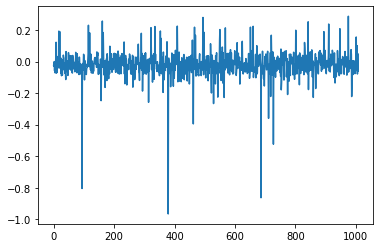

In [124]:
LogTraining.PredictTheResult()
LogTraining.PlotThePredicted_DF()

### Looks like it is not working much for this one 2^Addition but it has decent performance for Sqrt(Addition) and Log(Addition). Time for you to roll up tricks from your sleeves

## Now let us do classification on the final column and call it bye for this csv file. 
### To do that first we have to replace odd and even with 0 and 1 in the DF and thus we modify the class slightly.

In [171]:
class Training_Tensorflow_Classification:
    
    def __init__(self, 
                 A = Master_DF.A, 
                 B = Master_DF.B, 
                 OutputVector=None, 
                 ClassificationOrRegression="Regression"):

        Master_DF['Odd'] = np.where(Master_DF['ODD_OR_EVEN(CEIL(A+B))']=="Odd",1,0)
        Master_DF['Even'] = np.where(Master_DF['ODD_OR_EVEN(CEIL(A+B))']=="Even",1,0)
        self.Master_DF_Classification = Master_DF.copy()
        self.A = A
        self.B = B
        self.OutputVector = OutputVector
        self.TypeOfTraining = ClassificationOrRegression
        self.Training_DF = None
        self.Test_DF = None
        self.Model = None
        self.Predicted_DF = None
        self.TrainTestSplit()
        
    def TrainTestSplit(self, TestFractionSize=0.2):
        self.Training_DF, self.Test_DF = train_test_split(self.Master_DF_Classification, test_size=TestFractionSize)
        
        
    def TrainTheModel(self, 
                      DenseNodeSize = 2000, 
                      batch_size=500, 
                      epochs=25, 
                      activation='linear',
                      optimizer='sgd', 
                      loss='binary_crossentropy',
                      final_activation='linear'):
        self.Model = tf.keras.Sequential()
        self.Model.add(keras.layers.Dense(DenseNodeSize, activation=activation))
        self.Model.add(keras.layers.Dense(DenseNodeSize/10, activation=activation))
        self.Model.add(keras.layers.Dense(DenseNodeSize/100, activation=activation))
        self.Model.add(keras.layers.Dense(2, activation=final_activation))
        self.Model.compile(optimizer=optimizer,loss=loss,metrics=['accuracy'])
        xs = np.array([(a,b) for a,b in zip(self.Training_DF.A,self.Training_DF.B)])
        ys = np.array([(a,b) for a,b in zip(self.Training_DF['Odd'],self.Training_DF['Even'])])
        self.Model.fit(xs,ys,batch_size=batch_size,epochs=epochs)
        
    def PredictTheResult(self):
        self.Predicted_DF = pd.DataFrame(columns=['InputVals','PredictedVals','Difference'],dtype='float')
        self.Predicted_DF.InputVals = np.apply_along_axis(lambda x: np.argmax(x), 1,self.Test_DF[['Odd','Even']])
        xs = np.array([(a,b) for a,b in zip(self.Test_DF.A,self.Test_DF.B)])
        self.Predicted_DF.PredictedVals = np.apply_along_axis(lambda x: np.argmax(x), 1, self.Model.predict(xs)[:len(self.Test_DF)])
        self.Predicted_DF.Difference = self.Predicted_DF.InputVals - self.Predicted_DF.PredictedVals
        
    def PredictOneVal(self, A=None, B=None):
        return np.round(self.Model.predict(np.array([[A,B]]))[0],2)
    
    def PlotThePredicted_DF(self):
        plt.figure(figsize=(24,7))
        plt.plot(self.Predicted_DF.index,self.Predicted_DF.Difference)
        plt.show()

In [172]:
OddEvenTraining = Training_Tensorflow_Classification(OutputVector=['Odd','Even'])
OddEvenTraining.TrainTheModel(DenseNodeSize=500, batch_size=500,final_activation='sigmoid',activation='tanh',optimizer='adam',epochs=1000)

Train on 8000 samples
Epoch 1/1000
8000/8000 [==============================] - 0s 61us/sample - loss: 0.7016 - accuracy: 0.4979
Epoch 2/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.6975 - accuracy: 0.5004
Epoch 3/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.6993 - accuracy: 0.5052
Epoch 4/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6959 - accuracy: 0.5066
Epoch 5/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.6945 - accuracy: 0.5034
Epoch 6/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6939 - accuracy: 0.5081
Epoch 7/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6933 - accuracy: 0.5089
Epoch 8/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.6929 - accuracy: 0.5129
Epoch 9/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6935 - accuracy: 0.5112
Epoch 10/1000
8000/

8000/8000 [==============================] - 0s 9us/sample - loss: 0.6919 - accuracy: 0.5191
Epoch 78/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.6920 - accuracy: 0.5190
Epoch 79/1000
8000/8000 [==============================] - 0s 7us/sample - loss: 0.6920 - accuracy: 0.5157
Epoch 80/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.6919 - accuracy: 0.5195
Epoch 81/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.6917 - accuracy: 0.5234
Epoch 82/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6918 - accuracy: 0.5217
Epoch 83/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.6919 - accuracy: 0.5198
Epoch 84/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6919 - accuracy: 0.5169
Epoch 85/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.6921 - accuracy: 0.5198
Epoch 86/1000
8000/8000 [=========================

8000/8000 [==============================] - 0s 9us/sample - loss: 0.6907 - accuracy: 0.5290
Epoch 154/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.6905 - accuracy: 0.5332
Epoch 155/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.6904 - accuracy: 0.5296
Epoch 156/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.6907 - accuracy: 0.5291
Epoch 157/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6906 - accuracy: 0.5297
Epoch 158/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6906 - accuracy: 0.5271
Epoch 159/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6905 - accuracy: 0.5325
Epoch 160/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6907 - accuracy: 0.5284
Epoch 161/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6907 - accuracy: 0.5277
Epoch 162/1000
8000/8000 [================

Epoch 229/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6819 - accuracy: 0.5597
Epoch 230/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6814 - accuracy: 0.5682
Epoch 231/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6819 - accuracy: 0.5602
Epoch 232/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6804 - accuracy: 0.5701
Epoch 233/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.6814 - accuracy: 0.5662
Epoch 234/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6803 - accuracy: 0.5709
Epoch 235/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6796 - accuracy: 0.5707
Epoch 236/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.6793 - accuracy: 0.5729
Epoch 237/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.6786 - accuracy: 0.5790
Epoch 238/1000
8000/8000 [==

8000/8000 [==============================] - 0s 9us/sample - loss: 0.5992 - accuracy: 0.6341
Epoch 305/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.5969 - accuracy: 0.6357
Epoch 306/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.5990 - accuracy: 0.6287
Epoch 307/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.5996 - accuracy: 0.6306
Epoch 308/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.5976 - accuracy: 0.6353
Epoch 309/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.5954 - accuracy: 0.6327
Epoch 310/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.5936 - accuracy: 0.6363
Epoch 311/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.5926 - accuracy: 0.6386
Epoch 312/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.5913 - accuracy: 0.6355
Epoch 313/1000
8000/8000 [================

8000/8000 [==============================] - 0s 8us/sample - loss: 0.5327 - accuracy: 0.6799
Epoch 380/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.5292 - accuracy: 0.6834
Epoch 381/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.5307 - accuracy: 0.6791
Epoch 382/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.5287 - accuracy: 0.6801
Epoch 383/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.5301 - accuracy: 0.6806
Epoch 384/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.5282 - accuracy: 0.6808
Epoch 385/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.5262 - accuracy: 0.6860
Epoch 386/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.5254 - accuracy: 0.6873
Epoch 387/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.5286 - accuracy: 0.6805
Epoch 388/1000
8000/8000 [===============

8000/8000 [==============================] - 0s 9us/sample - loss: 0.5016 - accuracy: 0.6927
Epoch 455/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.5007 - accuracy: 0.6944
Epoch 456/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.5015 - accuracy: 0.6947
Epoch 457/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4987 - accuracy: 0.6944
Epoch 458/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.4981 - accuracy: 0.6955
Epoch 459/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4992 - accuracy: 0.6936
Epoch 460/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4981 - accuracy: 0.6961
Epoch 461/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.5007 - accuracy: 0.6937
Epoch 462/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4988 - accuracy: 0.6936
Epoch 463/1000
8000/8000 [================

8000/8000 [==============================] - 0s 9us/sample - loss: 0.4818 - accuracy: 0.7052
Epoch 530/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4824 - accuracy: 0.7066
Epoch 531/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4831 - accuracy: 0.7049
Epoch 532/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4828 - accuracy: 0.7032
Epoch 533/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4841 - accuracy: 0.7046
Epoch 534/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4863 - accuracy: 0.7025
Epoch 535/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4879 - accuracy: 0.7027
Epoch 536/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4888 - accuracy: 0.7036
Epoch 537/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4840 - accuracy: 0.7049
Epoch 538/1000
8000/8000 [=================

8000/8000 [==============================] - 0s 11us/sample - loss: 0.4785 - accuracy: 0.7080
Epoch 605/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4731 - accuracy: 0.7109
Epoch 606/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4716 - accuracy: 0.7118
Epoch 607/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4749 - accuracy: 0.7075
Epoch 608/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4757 - accuracy: 0.7090
Epoch 609/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4744 - accuracy: 0.7099
Epoch 610/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4730 - accuracy: 0.7135
Epoch 611/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4763 - accuracy: 0.7084
Epoch 612/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4699 - accuracy: 0.7135
Epoch 613/1000
8000/8000 [================

Epoch 680/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4528 - accuracy: 0.7253
Epoch 681/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4497 - accuracy: 0.7293
Epoch 682/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4540 - accuracy: 0.7205
Epoch 683/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4508 - accuracy: 0.7287
Epoch 684/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4530 - accuracy: 0.7257
Epoch 685/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4508 - accuracy: 0.7276
Epoch 686/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4487 - accuracy: 0.7324
Epoch 687/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4532 - accuracy: 0.7274
Epoch 688/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.4496 - accuracy: 0.7287
Epoch 689/1000
8000/8000 [=

8000/8000 [==============================] - 0s 9us/sample - loss: 0.4319 - accuracy: 0.7381
Epoch 756/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4328 - accuracy: 0.7343
Epoch 757/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4299 - accuracy: 0.7401
Epoch 758/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4309 - accuracy: 0.7342
Epoch 759/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4306 - accuracy: 0.7353
Epoch 760/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.4353 - accuracy: 0.7326
Epoch 761/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4313 - accuracy: 0.7396
Epoch 762/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4283 - accuracy: 0.7414
Epoch 763/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4329 - accuracy: 0.7361
Epoch 764/1000
8000/8000 [================

8000/8000 [==============================] - 0s 8us/sample - loss: 0.4168 - accuracy: 0.7449
Epoch 831/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4162 - accuracy: 0.7434
Epoch 832/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.4155 - accuracy: 0.7493
Epoch 833/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4175 - accuracy: 0.7446
Epoch 834/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4178 - accuracy: 0.7459
Epoch 835/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4211 - accuracy: 0.7442
Epoch 836/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4159 - accuracy: 0.7427
Epoch 837/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4146 - accuracy: 0.7479
Epoch 838/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.4130 - accuracy: 0.7482
Epoch 839/1000
8000/8000 [================

Epoch 906/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4070 - accuracy: 0.7546
Epoch 907/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.3997 - accuracy: 0.7583
Epoch 908/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.3994 - accuracy: 0.7580
Epoch 909/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.4030 - accuracy: 0.7554
Epoch 910/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4054 - accuracy: 0.7529
Epoch 911/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4115 - accuracy: 0.7489
Epoch 912/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4063 - accuracy: 0.7567
Epoch 913/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.4118 - accuracy: 0.7478
Epoch 914/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.4040 - accuracy: 0.7516
Epoch 915/1000
8000/8000 [

8000/8000 [==============================] - 0s 9us/sample - loss: 0.3880 - accuracy: 0.7629
Epoch 982/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.3822 - accuracy: 0.7641
Epoch 983/1000
8000/8000 [==============================] - 0s 11us/sample - loss: 0.3870 - accuracy: 0.7626
Epoch 984/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.3881 - accuracy: 0.7566
Epoch 985/1000
8000/8000 [==============================] - 0s 10us/sample - loss: 0.3832 - accuracy: 0.7623
Epoch 986/1000
8000/8000 [==============================] - 0s 8us/sample - loss: 0.3829 - accuracy: 0.7653
Epoch 987/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.3833 - accuracy: 0.7628
Epoch 988/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.3783 - accuracy: 0.7638
Epoch 989/1000
8000/8000 [==============================] - 0s 9us/sample - loss: 0.3789 - accuracy: 0.7649
Epoch 990/1000
8000/8000 [===============

In [173]:
OddEvenTraining.PredictOneVal(A=1.3,B=1.77)

array([0.05, 0.95], dtype=float32)

In [174]:
OddEvenTraining.PredictOneVal(A=1.5,B=4.6)

array([0.52, 0.48], dtype=float32)

In [175]:
OddEvenTraining.PredictTheResult()

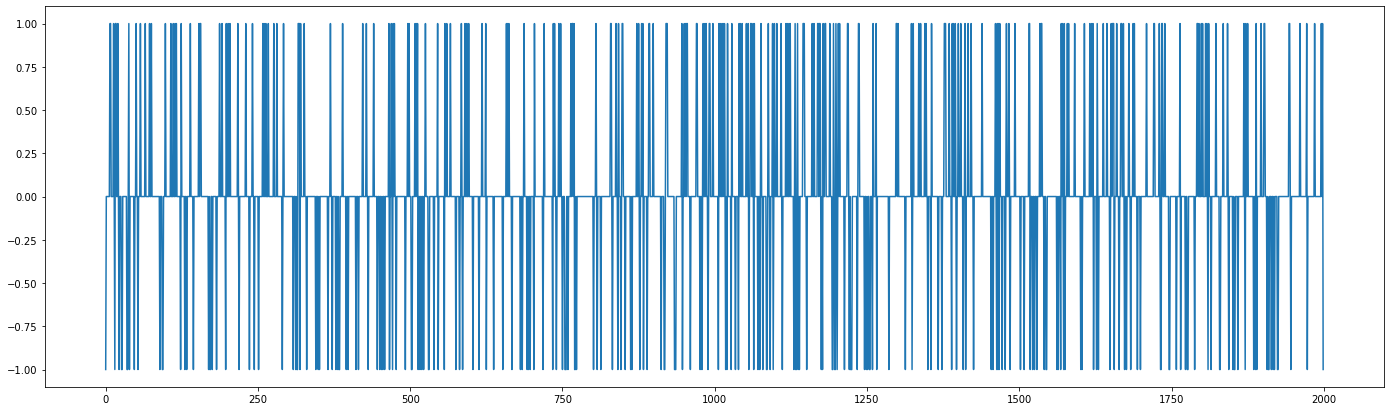

In [176]:
OddEvenTraining.PlotThePredicted_DF()

In [177]:
PercentageMisclassification = np.sum(np.abs(OddEvenTraining.Predicted_DF.Difference))/len(OddEvenTraining.Predicted_DF)*100
PercentageMisclassification

24.7

### Looks like it worked decently given a basic NN we have used. 